# K-Nearest Neighbors

At this point we have seen many examples for classifying data.  One of the simplest algorithms is K-Nearest Neighbors (KNN).

The K-Nearest Neighbors (KNN) algorithm is a method used for **classification** or **regression**. In both cases, the input consists of the k closest training examples in the feature space.  Given a new, unknown observation, look up which points have the closest features and assign the predominant class.

We begin with the standard imports:


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## Load the Iris Dataset

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

n_samples, n_features = iris.data.shape
print(iris.keys())
print((n_samples, n_features))
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


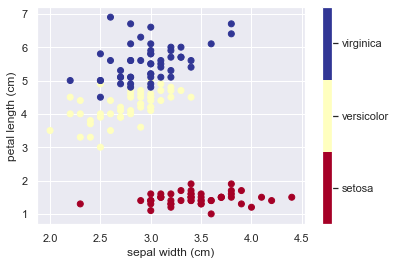

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 'sepal width (cm)'
x_index = 1
# 'petal length (cm)'
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## K-Nearest Neighbors Classifier

In [11]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')

['versicolor']
['setosa' 'versicolor' 'virginica']
[[0.  0.8 0.2]]


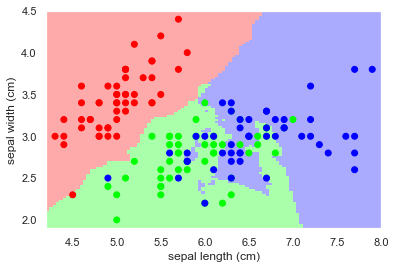

In [12]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
X_pred = [3, 5, 4, 2]
result = knn.predict([X_pred, ])

print(iris.target_names[result])
print(iris.target_names)
print(knn.predict_proba([X_pred, ]))

plot_iris_knn()

Note we see overfitting in the K-Nearest Neighbors model above.  We'll be addressing overfitting and model validation in a later notebook.